# Day Ahead Prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
day_ahead = pd.read_csv('data/Day Ahead Auction Prices.csv')
day_ahead['Date'] = pd.to_datetime(day_ahead['Date'])
day_ahead.set_index('Date', inplace=True)
day_ahead.columns = ['price']
day_ahead.head()

,price
Date,
2016-01-01 00:00:00,23.86
2016-01-01 01:00:00,22.39
2016-01-01 02:00:00,20.59
2016-01-01 03:00:00,16.81
2016-01-01 04:00:00,17.41


<Axes: xlabel='Date'>

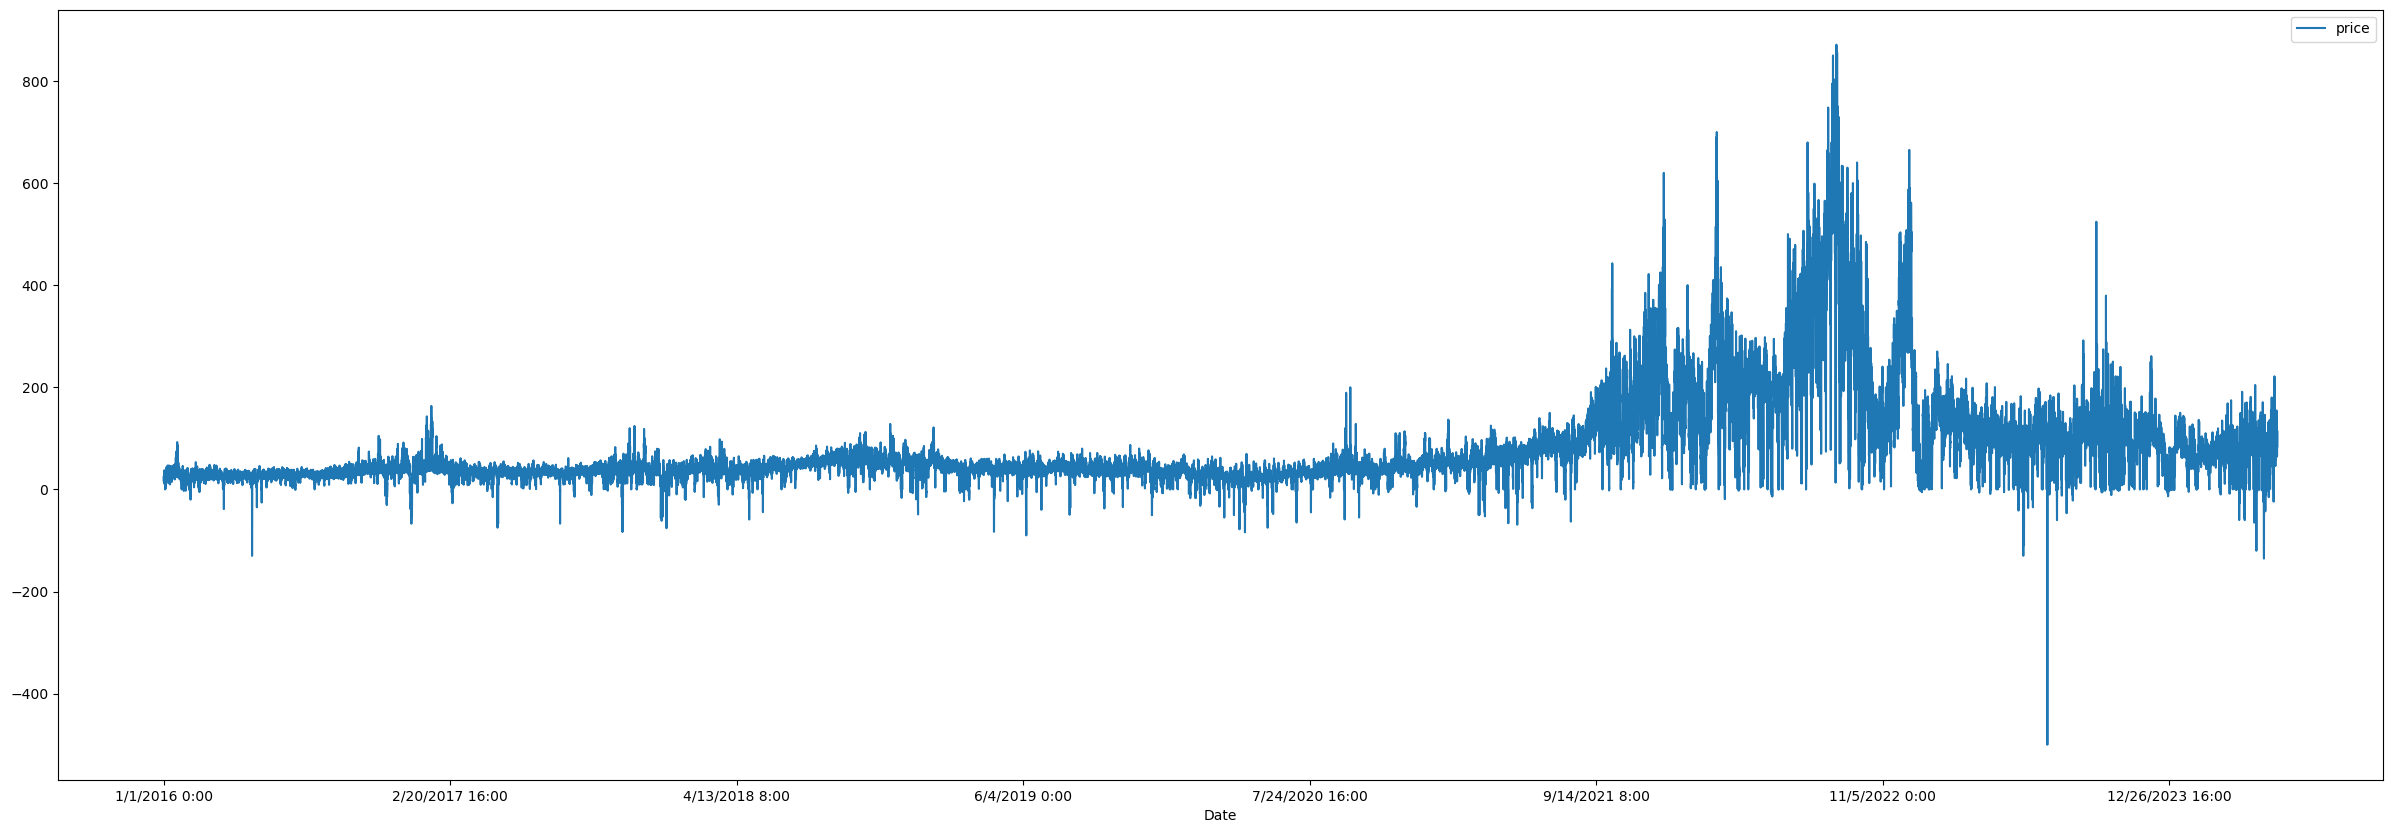

In [9]:
day_ahead.plot(figsize=(30, 10))

<Axes: xlabel='Date'>

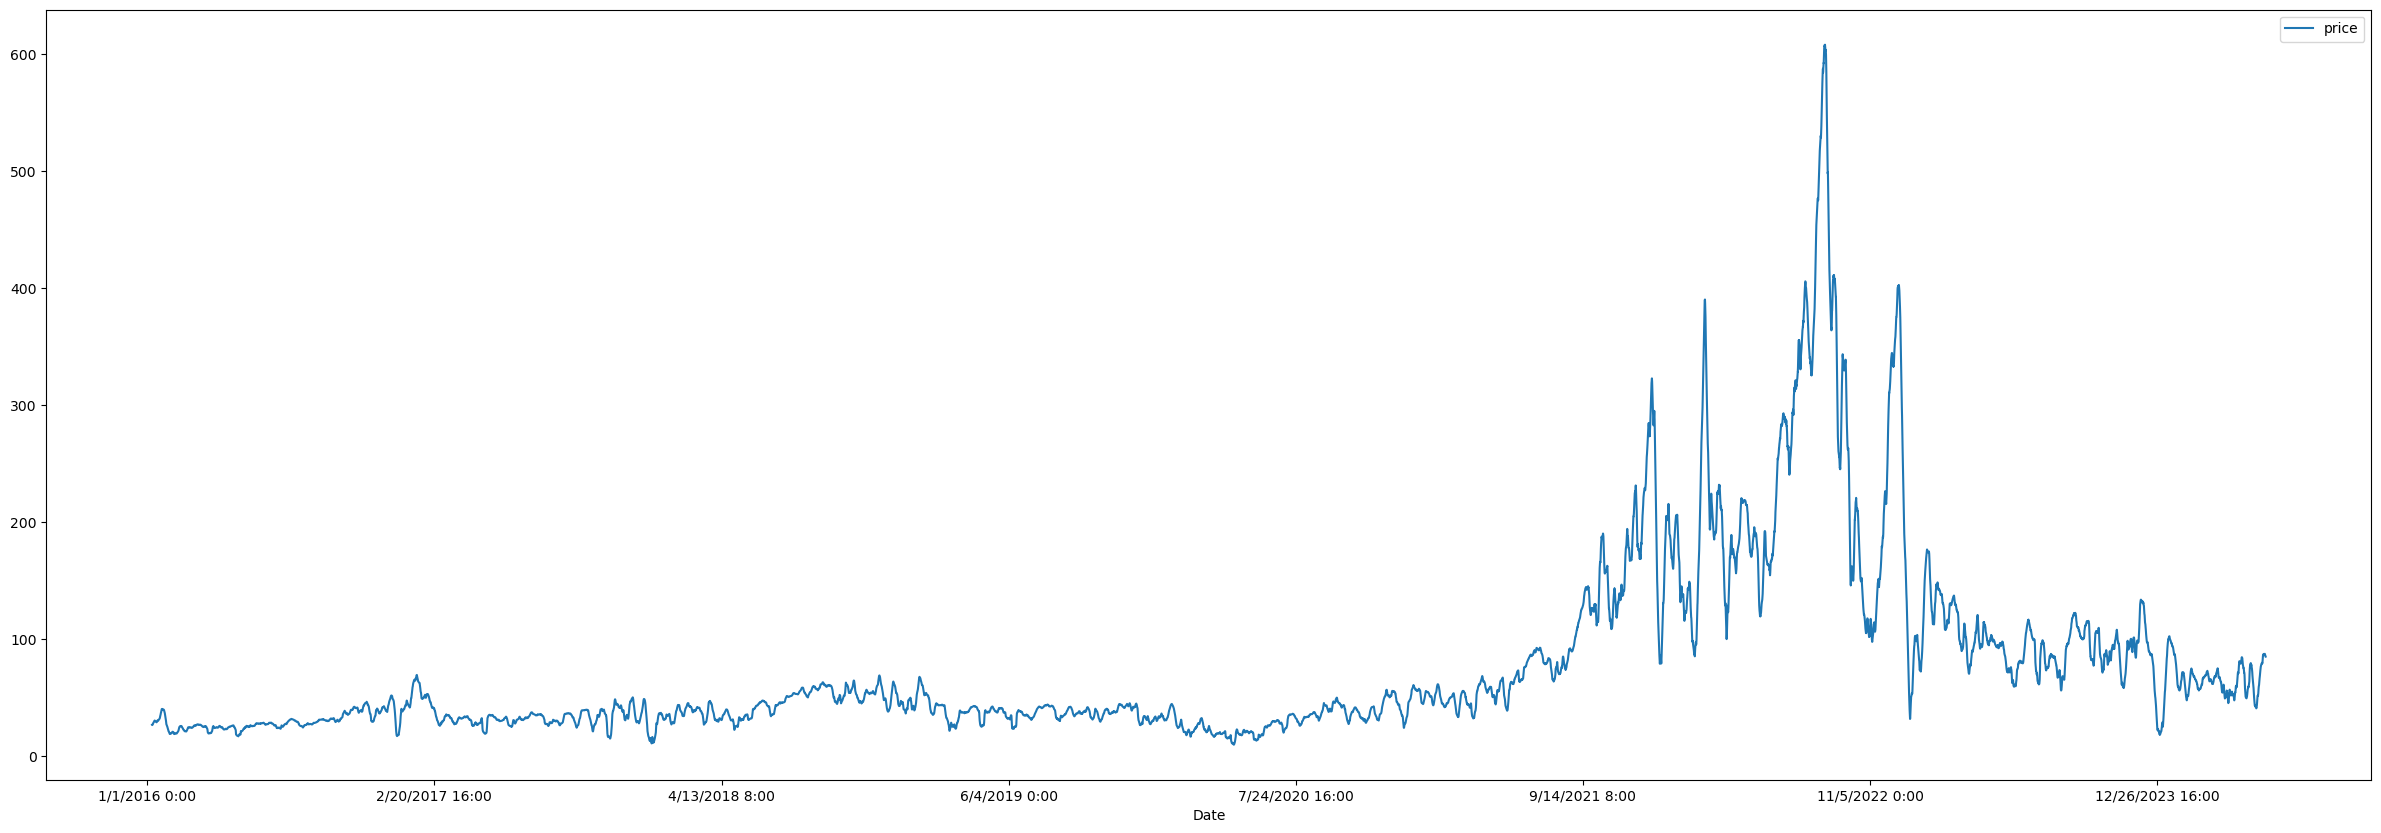

In [26]:
day_ahead.rolling(24*7).mean().plot(figsize=(30, 10))

array([[<Axes: title={'center': 'price'}>]], dtype=object)

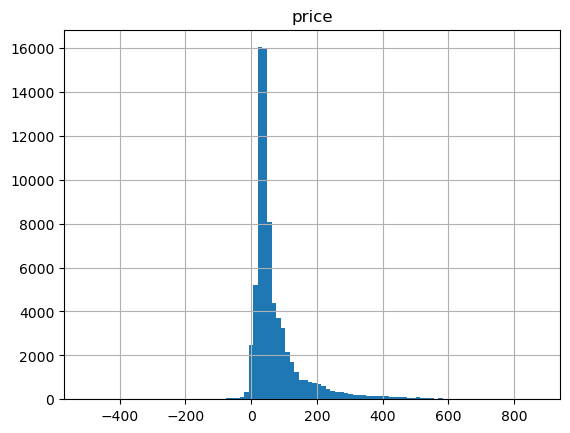

In [11]:
day_ahead.hist(bins=100)

In [13]:
day_ahead[day_ahead['price']==min(day_ahead.price)]

,price
Date,
7/2/2023 14:00,-500.0


What happened on 7th februar 2023?

C:\Users\wankm\AppData\Local\Temp\ipykernel_48872\274244495.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  day_ahead['2023-07-02'].plot()


<Axes: xlabel='Date'>

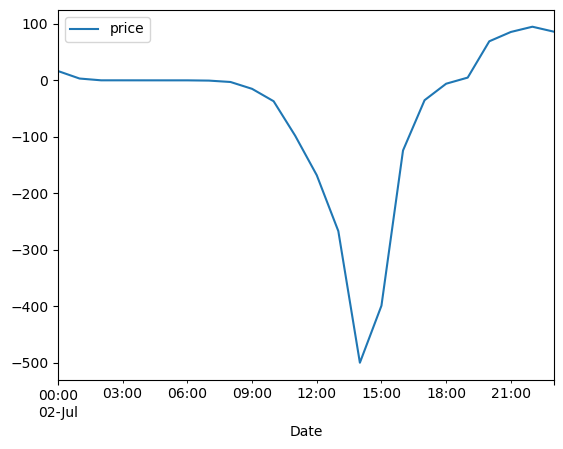

In [56]:
#filter for 7th february 2023
day_ahead['2023-07-02'].plot()

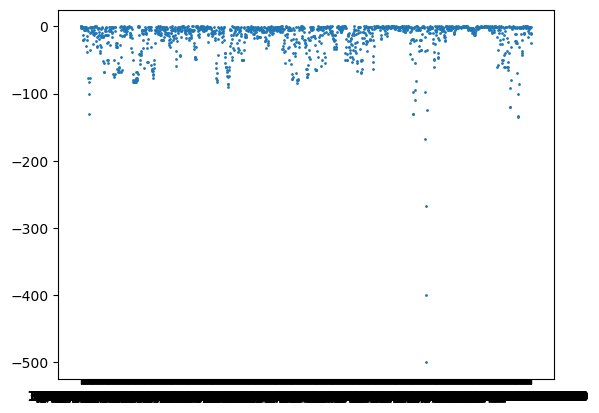

In [20]:
plt.scatter(day_ahead[day_ahead['price']<0].index, day_ahead[day_ahead['price']<0].price,s=1)

# Holiday Calendar

In [43]:
holidays = pd.read_csv('data/PUBLIC_HOLIDAYS_CALENDAR_GERMANY_2019-2024.csv',sep=';')
holidays.head()

,Identifier,TimeStamp,Begin,End,DayStatus,DayName,ValidationStatus,ChangeComment
0,PUBLIC_HOLIDAYS_CALENDAR_GERMANY,2019-01-01T00:00:00.000+0100,2019-01-01T00:00:00.000+0100,2019-01-02T00:00:00.000+0100,True,New Year's Day,UNVALIDATED,NaN
1,PUBLIC_HOLIDAYS_CALENDAR_GERMANY,2019-01-02T00:00:00.000+0100,2019-01-02T00:00:00.000+0100,2019-01-03T00:00:00.000+0100,False,None,UNVALIDATED,NaN
2,PUBLIC_HOLIDAYS_CALENDAR_GERMANY,2019-01-03T00:00:00.000+0100,2019-01-03T00:00:00.000+0100,2019-01-04T00:00:00.000+0100,False,None,UNVALIDATED,NaN
3,PUBLIC_HOLIDAYS_CALENDAR_GERMANY,2019-01-04T00:00:00.000+0100,2019-01-04T00:00:00.000+0100,2019-01-05T00:00:00.000+0100,False,None,UNVALIDATED,NaN
4,PUBLIC_HOLIDAYS_CALENDAR_GERMANY,2019-01-05T00:00:00.000+0100,2019-01-05T00:00:00.000+0100,2019-01-06T00:00:00.000+0100,False,None,UNVALIDATED,NaN


In [44]:
print(holidays.Identifier.unique())
holidays.drop(columns=['Identifier'],inplace=True)
holidays.ChangeComment.unique()
holidays.drop(columns=['ChangeComment'],inplace=True)
print(holidays.ValidationStatus.value_counts())
holidays.drop(columns=['ValidationStatus'],inplace=True)


['PUBLIC_HOLIDAYS_CALENDAR_GERMANY']
UNVALIDATED    2115
Name: ValidationStatus, dtype: int64


In [45]:
holidays.DayStatus.value_counts()

False    2063
True       52
Name: DayStatus, dtype: int64

In [46]:
holidays[(holidays.DayStatus==True) & (holidays.DayName.isnull())]
#all holiday have a day name

,TimeStamp,Begin,End,DayStatus,DayName


In [51]:
#check length
holidays["length"] = pd.to_datetime(holidays["End"]) - pd.to_datetime(holidays["Begin"])
holidays.length.value_counts()
#summer time messes up sometimes

1 days 00:00:00    2104
0 days 23:00:00       6
1 days 01:00:00       5
Name: length, dtype: int64

# Future Contracts

In [68]:
daily = pd.read_csv('data/EEX_POWER_FUT_DE_BASE_D_2021-2024.csv',sep=';')
daily.drop(columns=['Price','ChangeComment','ValidationStatus'],inplace=True)
daily.head(20)

,Identifier,TimeStamp,Begin,End,Open,High,Low,Close,Settlement
0,EEX_POWER_FUT_DE_BASE_D,2021-01-04T00:00:00.000+0100,2021-01-01T00:00:00.000+0100,2021-01-02T00:00:00.000+0100,NaN,NaN,NaN,NaN,"48,40"
1,EEX_POWER_FUT_DE_BASE_D,2021-01-04T00:00:00.000+0100,2021-01-02T00:00:00.000+0100,2021-01-03T00:00:00.000+0100,NaN,NaN,NaN,NaN,"50,56"
2,EEX_POWER_FUT_DE_BASE_D,2021-01-04T00:00:00.000+0100,2021-01-03T00:00:00.000+0100,2021-01-04T00:00:00.000+0100,NaN,NaN,NaN,NaN,"38,62"
3,EEX_POWER_FUT_DE_BASE_D,2021-01-04T00:00:00.000+0100,2021-01-04T00:00:00.000+0100,2021-01-05T00:00:00.000+0100,NaN,NaN,NaN,NaN,"48,02"
4,EEX_POWER_FUT_DE_BASE_D,2021-01-04T00:00:00.000+0100,2021-01-05T00:00:00.000+0100,2021-01-06T00:00:00.000+0100,"54,50","54,50","53,50","54,00","55,34"
5,EEX_POWER_FUT_DE_BASE_D,2021-01-04T00:00:00.000+0100,2021-01-06T00:00:00.000+0100,2021-01-07T00:00:00.000+0100,"58,00","58,00","54,00","54,00","56,03"
6,EEX_POWER_FUT_DE_BASE_D,2021-01-04T00:00:00.000+0100,2021-01-07T00:00:00.000+0100,2021-01-08T00:00:00.000+0100,"69,25","69,25","68,00","68,00","69,25"
7,EEX_POWER_FUT_DE_BASE_D,2021-01-04T00:00:00.000+0100,2021-01-08T00:00:00.000+0100,2021-01-09T00:00:00.000+0100,"69,50","69,50","69,50","69,50","71,38"
8,EEX_POWER_FUT_DE_BASE_D,2021-01-04T00:00:00.000+0100,2021-01-09T00:00:00.000+0100,2021-01-10T00:00:00.000+0100,NaN,NaN,NaN,NaN,"55,31"
9,EEX_POWER_FUT_DE_BASE_D,2021-01-04T00:00:00.000+0100,2021-01-10T00:00:00.000+0100,2021-01-11T00:00:00.000+0100,NaN,NaN,NaN,NaN,"48,59"
